# Introduction (5 Points)

In 2018 the U.S Supreme Court     overturned the Federal ban on sportsbetting 
Americans wagered 52.7 Billion USD in 2021, double than the year before
The Sportsbetting Market is expected to grow by 106 Billion USD by 2025 

Save costs on expensive personnel (data scouts) and equipment
Modern technology allows us to collect much more data
Machine Learning can handle a large amount and wide variety of data
Sport betting options are expanding and  consumers want variety

# Methods (10 Points)

Here, load and describe the data. Discuss and do any processing to the data in this section. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn import metrics

## Loading the data

In [2]:
pred_data = pd.read_csv('2021seasondata.csv')
data = pd.read_csv('2003to2020leaguedata.csv')
data.head()

,Rk,Team,Year,Playoff Wins,MP,FG,FGA,FG%,3P,3PA,...,3PAr,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Attendance
0,1,San Antonio Spurs,2003,16,14,16,27,4,11,11,...,7,4,24,13,6,2,12,17,3,11
1,2,New Jersey Nets,2003,14,26,17,18,14,23,22,...,22,21,16,14,7,4,3,6,14,23
2,3,Dallas Mavericks,2003,10,24,3,2,7,2,2,...,2,3,1,27,20,15,9,19,10,3
3,4,Detroit Pistons,2003,8,5,26,28,24,6,6,...,3,14,9,24,9,5,15,1,15,1
4,5,Sacramento Kings,2003,7,14,1,1,3,7,9,...,12,2,6,26,29,1,18,21,5,12


In [3]:
pred_data.head()

,RK,Team,Year,Playoff Wins,MP,FG,FGA,FG%,3P,3PA,...,3PAr,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Attendance
0,1,Milwalkee Bucks,2021,16,22,1,1,3,5,8,...,12,2,12,9,26,13,24,3,1,10
1,2,Phoenix Suns,2021,14,2,2,16,2,13,15,...,15,3,4,25,27,10,16,9,14,4
2,3,Atlanta Hawks,2021,10,14,19,23,17,17,19,...,19,16,9,4,1,6,28,16,13,13
3,4,Los Angeles Clippers,2021,10,30,12,25,5,6,14,...,13,4,14,12,19,8,19,6,10,24
4,5,Philadelphia 76ers,2021,7,7,14,24,8,23,26,...,26,14,21,10,2,3,2,11,22,8


In [4]:
data.columns

Index(['Rk', 'Team', 'Year', 'Playoff Wins', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'PW', 'PL',
       'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1', 'DRB%', 'FT/FGA.1',
       'Attendance'],
      dtype='object')

In [5]:
data = data.drop(columns = ['Rk'],)
pred_data = pred_data.drop(columns = ['RK'])

In [6]:
data.head()

,Team,Year,Playoff Wins,MP,FG,FGA,FG%,3P,3PA,3P%,...,3PAr,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Attendance
0,San Antonio Spurs,2003,16,14,16,27,4,11,11,11,...,7,4,24,13,6,2,12,17,3,11
1,New Jersey Nets,2003,14,26,17,18,14,23,22,22,...,22,21,16,14,7,4,3,6,14,23
2,Dallas Mavericks,2003,10,24,3,2,7,2,2,3,...,2,3,1,27,20,15,9,19,10,3
3,Detroit Pistons,2003,8,5,26,28,24,6,6,8,...,3,14,9,24,9,5,15,1,15,1
4,Sacramento Kings,2003,7,14,1,1,3,7,9,4,...,12,2,6,26,29,1,18,21,5,12


## Checking for correlation with Target Variable

In [7]:
corr = data.corr().abs()
playoff_corr = corr['Playoff Wins']
print(corr.head())

                  Year  Playoff Wins        MP        FG       FGA       FG%  \
Year          1.000000      0.011424  0.067246  0.008084  0.063720  0.036180   
Playoff Wins  0.011424      1.000000  0.179228  0.147040  0.130674  0.327249   
MP            0.067246      0.179228  1.000000  0.006300  0.130590  0.163576   
FG            0.008084      0.147040  0.006300  1.000000  0.628244  0.651748   
FGA           0.063720      0.130674  0.130590  0.628244  1.000000  0.050122   

                    3P       3PA       3P%        2P  ...      3PAr      eFG%  \
Year          0.019783  0.047442  0.049975  0.011666  ...  0.033860  0.037844   
Playoff Wins  0.149952  0.104035  0.256111  0.008879  ...  0.139131  0.367141   
MP            0.058627  0.047968  0.087367  0.063112  ...  0.078725  0.200297   
FG            0.073716  0.041531  0.221765  0.634990  ...  0.056030  0.496245   
FGA           0.128498  0.164126  0.075744  0.378205  ...  0.019409  0.082170   

                  TOV%      ORB%

In [8]:
playoff_corr.head()

Year            0.011424
Playoff Wins    1.000000
MP              0.179228
FG              0.147040
FGA             0.130674
Name: Playoff Wins, dtype: float64

In [9]:
corr = corr.loc[corr['Playoff Wins']>.30]
corr.index

Index(['Playoff Wins', 'FG%', '2P%', 'W', 'L', 'PW', 'PL', 'MOV', 'SRS',
       'ORtg', 'DRtg', 'eFG%', 'eFG%.1', 'Attendance'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation between Filtered Variables'}>

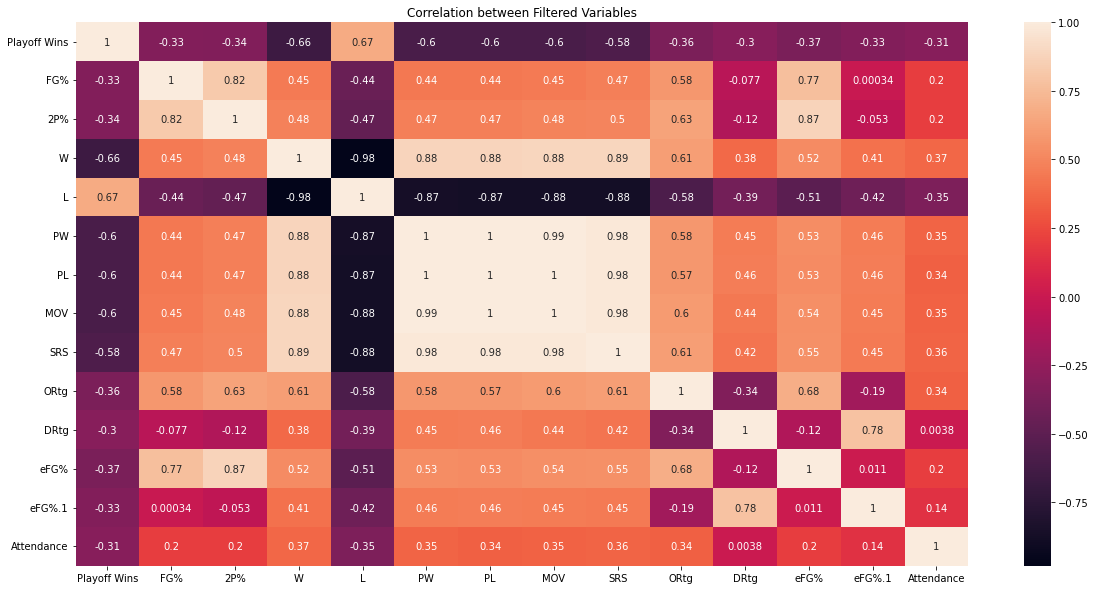

In [10]:
variables = list(corr.index)
plt.figure(figsize=(20,10))
plt.title("Correlation between Filtered Variables")
sns.heatmap(data=data[variables].corr(), annot=True)

In [11]:
X = data[variables].drop('Playoff Wins',1)
y = data['Playoff Wins']

C:\Users\Matthew\AppData\Local\Temp/ipykernel_3004/1452266552.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data[variables].drop('Playoff Wins',1)


## Dropping Correlated Features

In [12]:
from feature_engine.selection import DropCorrelatedFeatures

rm_high_corrs = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.85)
X_train_corr = rm_high_corrs.fit_transform(X)
X_train_corr

,FG%,2P%,W,ORtg,DRtg,eFG%.1,Attendance
0,4,1,1,7,3,2,11
1,14,16,8,18,1,4,23
2,7,7,1,1,9,15,3
3,24,24,5,15,4,5,1
4,3,3,3,6,2,1,12
...,...,...,...,...,...,...,...
283,27,28,15,24,9,18,22
284,15,24,17,10,27,14,8
285,10,14,12,17,6,12,3
286,26,19,15,23,8,4,25


In [13]:
variables = list(X_train_corr.columns)
pred_X = pred_data[variables]
pred_y = pred_data['Playoff Wins']
pred_X

,FG%,2P%,W,ORtg,DRtg,eFG%.1,Attendance
0,3,4,7,6,10,13,10
1,2,2,2,5,9,10,4
2,17,19,11,8,21,6,13
3,5,18,5,4,8,8,24
4,8,16,3,13,2,3,8
5,1,1,4,1,23,9,17
6,16,9,1,3,4,1,1
7,4,6,5,7,12,21,14
8,13,3,8,9,20,11,5
9,12,13,8,24,1,5,20


In [14]:
pred_y

0     16
1     14
2     10
3     10
4      7
5      7
6      6
7      4
8      3
9      2
10     2
11     1
12     1
13     1
14     1
15     0
Name: Playoff Wins, dtype: int64

## Splitting Data

In [15]:
X_train = X_train_corr
y_train = y
X_test = pred_X
y_test = pred_y

A summary description (what was done above and why) ...

# I loaded historical data back to 2003 because thats is when playoffs were changed to best of 7.

# I loaded stats where team rank was availible as a way of scaling and normalizng the data as the game has changed throughout the years.

# I then subest variables that have moderate (.3) correlation with Playoff wins. 

# From these subsetted variables I drop highly correlated feartures which also serves to drop redundant features. 

# I then split my data into training and testing sets.

# Results (10 points)

Fit your model(s) here, optimize, and finally report the validation statisitcs. Use comments `#` where relevant to clarify the steps.

In [16]:
#Starting with a linear regression to as baseline. 
lg_model = linear_model.LinearRegression()
lg_model.fit(X_train, y_train)
lg_model_predicted_wins = lg_model.predict(pred_X)
lg_model_predicted_wins

array([ 6.35838725,  9.69645998,  3.00651573,  6.47539288,  9.07144791,
        7.32266459, 10.12789945,  7.03228832,  5.61016067,  5.88082498,
        2.8556702 ,  3.75883053, -0.07183488, -0.35445103,  1.36523719,
        2.01082483])

In [17]:
print(metrics.mean_absolute_error(lg_model_predicted_wins, pred_y))

3.057836170624424


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores

array([-2.78065543, -2.9992333 , -3.21570485, -2.80975594, -2.55256915])

We see using various scoring methods this model is off my about 3 games.

In [19]:
lg_model_predicted_wins_df = pred_data[['Team','Playoff Wins']]
lg_model_predicted_wins_df['Predicted Playoff Wins'] = ""
lg_model_predicted_wins_df

C:\Users\Matthew\AppData\Local\Temp/ipykernel_3004/2437376368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lg_model_predicted_wins_df['Predicted Playoff Wins'] = ""


,Team,Playoff Wins,Predicted Playoff Wins
0,Milwalkee Bucks,16,
1,Phoenix Suns,14,
2,Atlanta Hawks,10,
3,Los Angeles Clippers,10,
4,Philadelphia 76ers,7,
5,Brooklyn Nets,7,
6,Utah Jazz,6,
7,Denver Nuggets,4,
8,Dallas Mavericks,3,
9,Los Angeles Lakers,2,


In [20]:
#Creating a side by side table for visulization. I will do this for every model I create.
i=0
while i<16:
    lg_model_predicted_wins_df.at[i, 'Predicted Playoff Wins'] = lg_model_predicted_wins[i]
    i+=1
lg_model_predicted_wins_df.sort_values(by='Predicted Playoff Wins',ascending=False)

,Team,Playoff Wins,Predicted Playoff Wins
6,Utah Jazz,6,10.127899
1,Phoenix Suns,14,9.69646
4,Philadelphia 76ers,7,9.071448
5,Brooklyn Nets,7,7.322665
7,Denver Nuggets,4,7.032288
3,Los Angeles Clippers,10,6.475393
0,Milwalkee Bucks,16,6.358387
9,Los Angeles Lakers,2,5.880825
8,Dallas Mavericks,3,5.610161
11,New York Knicks,1,3.758831


## Random Forest

In [21]:
#Creating a basline Random Forest 
rfr_model = RandomForestRegressor(n_estimators=350, random_state=0)
rfr_model.fit(X_train, y_train)
rfr_predicted_wins = rfr_model.predict(X_test)
print(metrics.mean_absolute_error(rfr_predicted_wins, y_test))

3.001785714285714


In [22]:
rfrscores = cross_val_score(rfr_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
rfrscores

array([-2.89054187, -2.96679803, -2.83492611, -2.64160401, -2.5124812 ])

Slight improvement to the model with it about 2.5 - 3 games off

In [23]:
rfr_predicted_wins

array([ 5.18857143, 12.41428571,  2.65714286,  5.4       ,  7.68857143,
        9.36      ,  8.66      ,  4.52571429,  4.04285714,  9.81428571,
        4.73428571,  2.65142857,  1.39428571,  1.76      ,  1.31428571,
        2.74285714])

In [24]:
rf_model_predicted_wins_df = pred_data[['Team','Playoff Wins']]
rf_model_predicted_wins_df['Predicted Playoff Wins'] = ""
rf_model_predicted_wins_df

C:\Users\Matthew\AppData\Local\Temp/ipykernel_3004/4282519355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_model_predicted_wins_df['Predicted Playoff Wins'] = ""


,Team,Playoff Wins,Predicted Playoff Wins
0,Milwalkee Bucks,16,
1,Phoenix Suns,14,
2,Atlanta Hawks,10,
3,Los Angeles Clippers,10,
4,Philadelphia 76ers,7,
5,Brooklyn Nets,7,
6,Utah Jazz,6,
7,Denver Nuggets,4,
8,Dallas Mavericks,3,
9,Los Angeles Lakers,2,


In [25]:
i=0
while i<16:
    rf_model_predicted_wins_df.at[i, 'Predicted Playoff Wins'] = rfr_predicted_wins[i]
    i+=1
rf_model_predicted_wins_df.sort_values(by='Predicted Playoff Wins',ascending=False)

,Team,Playoff Wins,Predicted Playoff Wins
1,Phoenix Suns,14,12.414286
9,Los Angeles Lakers,2,9.814286
5,Brooklyn Nets,7,9.36
6,Utah Jazz,6,8.66
4,Philadelphia 76ers,7,7.688571
3,Los Angeles Clippers,10,5.4
0,Milwalkee Bucks,16,5.188571
10,Portland Trailblazers,2,4.734286
7,Denver Nuggets,4,4.525714
8,Dallas Mavericks,3,4.042857


## Optimization

In [26]:
#Using random search to computation time
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state = 42)

In [27]:
#Defining parameter space
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [29]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs = -1)

In [30]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [31]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [32]:
rf_tuned = RandomForestRegressor(**rf_random.best_params_, random_state=0)
#Creating model with optimal parameters

In [33]:
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)
print(metrics.mean_absolute_error(rf_tuned_pred, y_test))

2.891892727350034


In [34]:
rfrtuned_model = rf_tuned.fit(X_train, y_train)
rfrscores2 = cross_val_score(rfrtuned_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
rfrscores2

array([-2.84596567, -3.00923181, -2.79413095, -2.68418133, -2.49434148])

See general improvement in model.

In [35]:
rf_model_predicted_wins_df = pred_data[['Team','Playoff Wins']]
rf_model_predicted_wins_df['Predicted Playoff Wins'] = ""

C:\Users\Matthew\AppData\Local\Temp/ipykernel_3004/2043918443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_model_predicted_wins_df['Predicted Playoff Wins'] = ""


In [36]:
i=0
while i<16:
    rf_model_predicted_wins_df.at[i, 'Predicted Playoff Wins'] = rf_tuned_pred[i]
    i+=1
rf_model_predicted_wins_df.sort_values(by='Predicted Playoff Wins',ascending=False)

,Team,Playoff Wins,Predicted Playoff Wins
1,Phoenix Suns,14,11.43063
6,Utah Jazz,6,8.939942
5,Brooklyn Nets,7,8.745465
4,Philadelphia 76ers,7,7.949592
9,Los Angeles Lakers,2,7.739861
0,Milwalkee Bucks,16,5.95278
3,Los Angeles Clippers,10,5.459956
7,Denver Nuggets,4,4.803731
8,Dallas Mavericks,3,3.969001
10,Portland Trailblazers,2,3.403852


## Neural Net

In [37]:
from keras.models import Sequential
from keras.layers import Dense
#Using neural net regression to see if we can create more robust model.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

basemodel = Sequential()
basemodel.add(Dense(32, activation = 'relu', input_dim = 7))
basemodel.add(Dense(units = 16, activation = 'relu'))
basemodel.add(Dense(units = 1))

In [39]:
basemodel.compile(optimizer = 'adam', loss = 'mean_absolute_error')
basemodel.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = basemodel.predict(X_test)

Epoch 1/100
29/29 [==============================] - 0s 529us/step - loss: 4.6060
Epoch 2/100
29/29 [==============================] - 0s 517us/step - loss: 4.0322
Epoch 3/100
29/29 [==============================] - 0s 553us/step - loss: 3.4806
Epoch 4/100
29/29 [==============================] - 0s 525us/step - loss: 3.0615
Epoch 5/100
29/29 [==============================] - 0s 532us/step - loss: 2.8114
Epoch 6/100
29/29 [==============================] - 0s 535us/step - loss: 2.7158
Epoch 7/100
29/29 [==============================] - 0s 492us/step - loss: 2.6557
Epoch 8/100
29/29 [==============================] - 0s 552us/step - loss: 2.6236
Epoch 9/100
29/29 [==============================] - 0s 570us/step - loss: 2.6080
Epoch 10/100
29/29 [==============================] - 0s 529us/step - loss: 2.5799
Epoch 11/100
29/29 [==============================] - 0s 538us/step - loss: 2.5676
Epoch 12/100
29/29 [==============================] - 0s 559us/step - loss: 2.5568
Epoch 13/100


In [40]:
y_pred

array([[ 5.420472 ],
       [14.094659 ],
       [ 2.159036 ],
       [ 3.9103973],
       [ 6.4011507],
       [ 6.482158 ],
       [ 9.208424 ],
       [ 4.910306 ],
       [ 5.9578257],
       [ 4.5808487],
       [ 4.62763  ],
       [ 3.4458034],
       [ 1.5014875],
       [ 1.7888826],
       [ 1.4677737],
       [ 2.3945787]], dtype=float32)

In [41]:
basenn_model_predicted_wins_df = pred_data[['Team','Playoff Wins']]
basenn_model_predicted_wins_df['Predicted Playoff Wins'] = ""

C:\Users\Matthew\AppData\Local\Temp/ipykernel_3004/3488523778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenn_model_predicted_wins_df['Predicted Playoff Wins'] = ""


In [42]:
i=0
while i<16:
    basenn_model_predicted_wins_df.at[i, 'Predicted Playoff Wins'] = y_pred[i]
    i+=1
basenn_model_predicted_wins_df.sort_values(by='Predicted Playoff Wins',ascending=False)

,Team,Playoff Wins,Predicted Playoff Wins
1,Phoenix Suns,14,[14.094659]
6,Utah Jazz,6,[9.208424]
5,Brooklyn Nets,7,[6.482158]
4,Philadelphia 76ers,7,[6.4011507]
8,Dallas Mavericks,3,[5.9578257]
0,Milwalkee Bucks,16,[5.420472]
7,Denver Nuggets,4,[4.910306]
10,Portland Trailblazers,2,[4.62763]
9,Los Angeles Lakers,2,[4.5808487]
3,Los Angeles Clippers,10,[3.9103973]


In [43]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.6696744568222681

In [44]:
#Here is our model with addional layers

# Initialising the NN
model = Sequential()
# Adding input layer
model.add(Dense(32, activation = 'relu', input_dim = 7))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
# Adding output layer
model.add(Dense(units = 1))

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred = model.predict(X_test)

Epoch 1/100
29/29 [==============================] - 0s 531us/step - loss: 4.6355
Epoch 2/100
29/29 [==============================] - 0s 536us/step - loss: 3.7708
Epoch 3/100
29/29 [==============================] - 0s 494us/step - loss: 3.0181
Epoch 4/100
29/29 [==============================] - 0s 539us/step - loss: 2.7278
Epoch 5/100
29/29 [==============================] - 0s 549us/step - loss: 2.6633
Epoch 6/100
29/29 [==============================] - 0s 536us/step - loss: 2.6083
Epoch 7/100
29/29 [==============================] - 0s 523us/step - loss: 2.5562
Epoch 8/100
29/29 [==============================] - 0s 536us/step - loss: 2.5381
Epoch 9/100
29/29 [==============================] - 0s 518us/step - loss: 2.5560
Epoch 10/100
29/29 [==============================] - 0s 524us/step - loss: 2.4797
Epoch 11/100
29/29 [==============================] - 0s 556us/step - loss: 2.4662
Epoch 12/100
29/29 [==============================] - 0s 572us/step - loss: 2.4648
Epoch 13/100


In [46]:
y_pred

array([[ 5.270118 ],
       [15.26473  ],
       [ 3.7207432],
       [ 3.894441 ],
       [ 8.3891945],
       [ 6.8934045],
       [ 8.381781 ],
       [ 5.089396 ],
       [ 6.115689 ],
       [ 8.52739  ],
       [ 8.813492 ],
       [ 3.0292163],
       [ 2.0065799],
       [ 1.5198689],
       [ 0.8224923],
       [ 3.5512989]], dtype=float32)

In [47]:
nn_model_predicted_wins_df = pred_data[['Team','Playoff Wins']]
nn_model_predicted_wins_df['Predicted Playoff Wins'] = ""

C:\Users\Matthew\AppData\Local\Temp/ipykernel_3004/2873210653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_model_predicted_wins_df['Predicted Playoff Wins'] = ""


In [48]:
i=0
while i<16:
    nn_model_predicted_wins_df.at[i, 'Predicted Playoff Wins'] = y_pred[i]
    i+=1
nn_model_predicted_wins_df.sort_values(by='Predicted Playoff Wins',ascending=False)

,Team,Playoff Wins,Predicted Playoff Wins
1,Phoenix Suns,14,[15.26473]
10,Portland Trailblazers,2,[8.813492]
9,Los Angeles Lakers,2,[8.52739]
4,Philadelphia 76ers,7,[8.3891945]
6,Utah Jazz,6,[8.381781]
5,Brooklyn Nets,7,[6.8934045]
8,Dallas Mavericks,3,[6.115689]
0,Milwalkee Bucks,16,[5.270118]
7,Denver Nuggets,4,[5.089396]
3,Los Angeles Clippers,10,[3.894441]


In [49]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.821528144464344

We see our model has a large improvement with an error of around 1.7 games.

# Conclusions (5 Points)

What can we conclude? Is the model successful? How will it be used? Importantly, what are some limitations that you might need to address going forward?

# Our neural network was the most sucessful. It was able to make accurate predicitons when things went as expected.


# As we can see the Milwalkee Bucks outperformed every model by a large margin. With things such as injuries and other factors, its is hard to predict these things.

# Making playoff wins the predictor simplified the task for regression but we could choose a better predictior. 

# For more accurate predictions, finding a way to incorporate playoff data as well as the "playoff" factor many teams/players experience where they perform differently than the regular season

### Bonus (Explainable AI, up to 5 extra points)

In the real world, people are rightfully skeptical when they hear about AI/ML success. Help build confidence in the model's predictions by using tools in the Week 10 Notebook. 

One way we can improve confidence in the models predictions is to see the individual contributions of features. 

This allows us to see what the model is using to make predictions as well as the quality of our data/features. 

I will perform Shapleu analysis on my Random Forest and Neural Network models. 

In [50]:
import shap

In [51]:
X_train = X_train_corr
X_train

,FG%,2P%,W,ORtg,DRtg,eFG%.1,Attendance
0,4,1,1,7,3,2,11
1,14,16,8,18,1,4,23
2,7,7,1,1,9,15,3
3,24,24,5,15,4,5,1
4,3,3,3,6,2,1,12
...,...,...,...,...,...,...,...
283,27,28,15,24,9,18,22
284,15,24,17,10,27,14,8
285,10,14,12,17,6,12,3
286,26,19,15,23,8,4,25


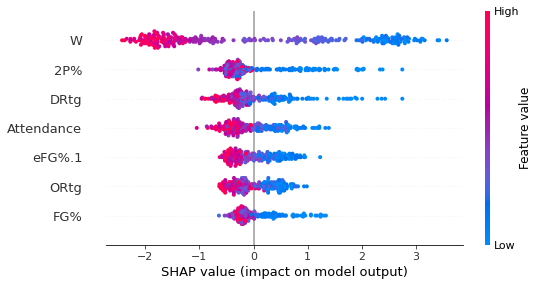

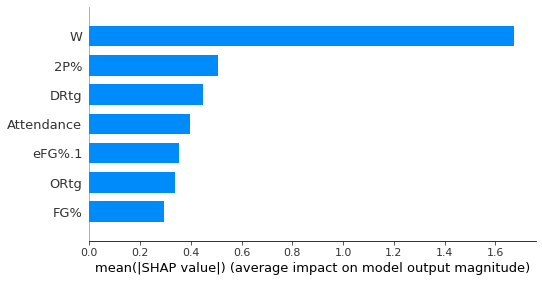

In [52]:
explainer = shap.TreeExplainer(rf_random.best_estimator_)
shap_values = explainer.shap_values(X_train)
expected_value = explainer.expected_value


shap.summary_plot(shap_values, X_train, title="Summary Plot") 

shap.summary_plot(shap_values, X_train, plot_type="bar") 




In [53]:
nn =  model.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
29/29 [==============================] - 0s 530us/step - loss: 5.9975
Epoch 2/100
29/29 [==============================] - 0s 546us/step - loss: 3.8316
Epoch 3/100
29/29 [==============================] - 0s 557us/step - loss: 3.6245
Epoch 4/100
29/29 [==============================] - 0s 558us/step - loss: 3.5025
Epoch 5/100
29/29 [==============================] - 0s 530us/step - loss: 3.1457
Epoch 6/100
29/29 [==============================] - 0s 536us/step - loss: 3.0220
Epoch 7/100
29/29 [==============================] - 0s 525us/step - loss: 2.9943
Epoch 8/100
29/29 [==============================] - 0s 558us/step - loss: 2.9448
Epoch 9/100
29/29 [==============================] - 0s 533us/step - loss: 2.8891
Epoch 10/100
29/29 [==============================] - 0s 533us/step - loss: 2.8574
Epoch 11/100
29/29 [==============================] - 0s 525us/step - loss: 2.8060
Epoch 12/100
29/29 [==============================] - 0s 524us/step - loss: 2.7134
Epoch 13/100


9/9 [==============================] - 0s 500us/step


Using 288 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


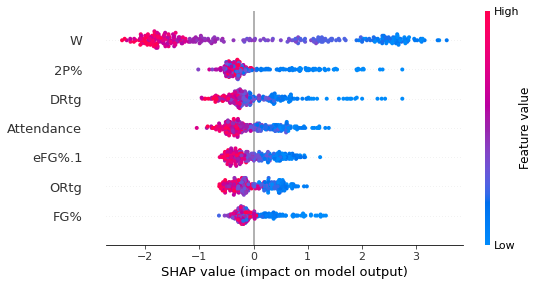

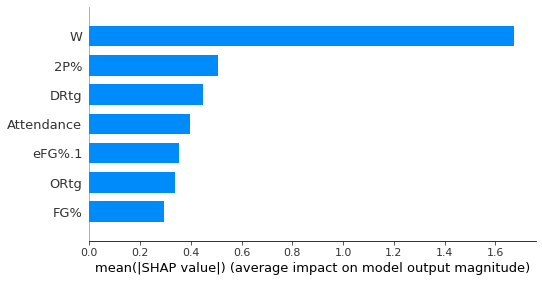

In [54]:
shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_train)
expected_value = explainer.expected_value


shap.summary_plot(shap_values, X_train, title="Summary Plot") 

shap.summary_plot(shap_values, X_train, plot_type="bar") 

# Overall we see that Regular Season Wins makes the largest contribution to Playoff Wins prediction by far.

# This suggests we might need better quality features or to do feature engineering to makes sure our model is learning from a combination of good features.

# In the bigger picture we would need to address data drift if we want to truly create the best model we can. 

# Although I attempted to keep data similar by using team rank, the game changes in such a variety of ways. 

# This means if we want to use historical data we need to find a way to keep the data consistent.


https://prezi.com/p/b3fcis2papwd/?present=1